<a href="https://colab.research.google.com/github/RomuloRangel/Projeto/blob/main/projeto_processamento_linguegem_natural_uniasselvi_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

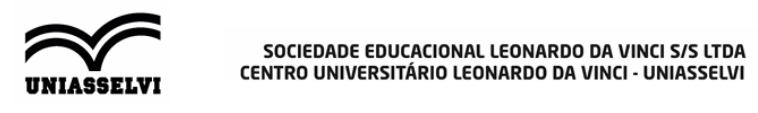









###Nome : **Romulo Rangel Alves Gomes**
###Matricula : **3768664**

#Projeto Processamento de Linguagem Natural (Nuvem de Palavras)


##Criação Algoritimo de Nuvem de palavras


A nuvem de palavras é uma representação visual que destaca termos mais frequentes em um conjunto de dados de texto, oferecendo uma visão intuitiva e impactante das principais palavras-chave associadas a determinado conteúdo. Essa ferramenta assume uma importância substancial em campanhas de marketing, onde a comunicação eficaz é essencial. Ao utilizar algoritmos de nuvem de palavras, os profissionais de marketing podem identificar padrões e temas recorrentes nas interações com os clientes, permitindo uma compreensão aprofundada das preferências e opiniões. Essa análise textual possibilita a criação de estratégias mais alinhadas com as expectativas do público-alvo, permitindo uma comunicação mais direcionada e personalizada. Dessa forma, a nuvem de palavras se torna uma ferramenta valiosa no arsenal de marketing, capacitando as empresas a ajustarem suas mensagens de forma dinâmica para maximizar o impacto e a relevância em suas campanhas.

###Obejetivo:
Busca de entidades nomeadas(Spacy) ,criação de uma nuvem de palavras com base em Links da Wikipédia.

###Data Set:
Como é um projeto que poderá ser replicado dependendo da utilização não terá um dataset especifico *(Configurado nesse projeto apenas para linguagem que usem Pt-BR)*.
No caso em questão será usado o Wikipédia\
link :https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial

###Biblioteca Usada :
**Spacy** \
\
link: https://spacy.io/api/annotation#named-entities


###Importando as Bibliotecas necessarias.

In [ ]:
!python3 -m spacy download pt

2023-12-14 22:49:29.971453: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 22:49:29.971535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 22:49:29.974155: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 22:49:32.301993: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.1 MB/s eta 0:00:00
✔ Download and installation success

In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

##Carregamento e definição da linguagem que será no Algoritimo de Processamento de Linguegem Natural (PLN)

In [ ]:
# Nessa Etapa atribuimos a variavel "pln" parametros de inserção da linguagem Pt ou seja utilizará o dicionario e a linguagem padrão o Portugues- BR
pln = spacy.load('pt_core_news_sm')
pln

##Carregamendo dos Dados

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

##Tratamentos para o texto.
Com a importação e leitura do link pela biblioteca 'urllib.request' importa todos as tags da pagina em questão sendo assim será aplicado um filtro para as tags < p > que são as tags em HTML responsaveis por ter textos que será o objeto em uso no projeto.

In [ ]:
# Usando a biblioteca Beautiful Soup que é usada para leituras de dados de paginas HTML
dados_html = bs.BeautifulSoup(dados, 'lxml')


In [ ]:
# Nessa etapa puxaremos os dados no formato que esta na pagina HTML
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 v

In [ ]:
# Selecionado as tags < p >
paragrafos = dados_html.find_all('p')

In [ ]:
print('O Numero de tags <p> que contem na pagina web é : ',len(paragrafos),'tags')

O Numero de tags <p> que contem na pagina web é :  61 tags


###Unificando as tags em uma variavel apenas

In [ ]:
# Criação de uma estrutura de repetição para percorrer todo o conteudo da pagina armazenando-o em uma variavel
conteudo = ''
for p in paragrafos:
  conteudo += p.text.lower()

In [ ]:
conteudo

'inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. algumas das principais áreas relacionadas à ia incluem:\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\no desenvolvimento da área

##Usando spacy para tokenizar o conteudo da pagina

In [ ]:
# Atribuindo a variavel 'doc' o conteudo passado como parametro da variavel criada como pln na linha 10
doc = pln(conteudo)

##Busca por endentidades Nomeadas - NER (Named-Entity Recognition)
Nessa etapa será usado a biblioteca do *Spacy* , ENT para extrair entidades nomeadas , no conteudo texto.


In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

cotidiano).[2 LOC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[3 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[8 PER
prolog MISC
gpt-3[14 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[11][18 ORG
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
sub-simbólico"?[25 MISC
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing.[31 LOC
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
int

###Transformando o documento em um display para vizualização melhor das entidades

In [ ]:
displacy.render(doc, style = 'ent', jupyter = True)

#Nuvem de Palavras

###Trabalhando com vocabulario em portugues e para limpar stop words ou seja conectivos palavras sem relevancia para a busca pois não são palavras contextuais.

In [ ]:
# Para iterar sobre o documento teremos que mudar o tipo de objeto PLN para texto
lista_token = []
for token in doc:
  lista_token.append(token.text)

# Tamanho Lista token
print('O tamanho da lista sem Stop wordsd é',len(lista_token),'Registros')

O tamanho da lista sem Stop wordsd é 6191 Registros


###Removendo Stop Words

In [ ]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

###Criação grafica da Nuvem de palavras com **Matplotlib**

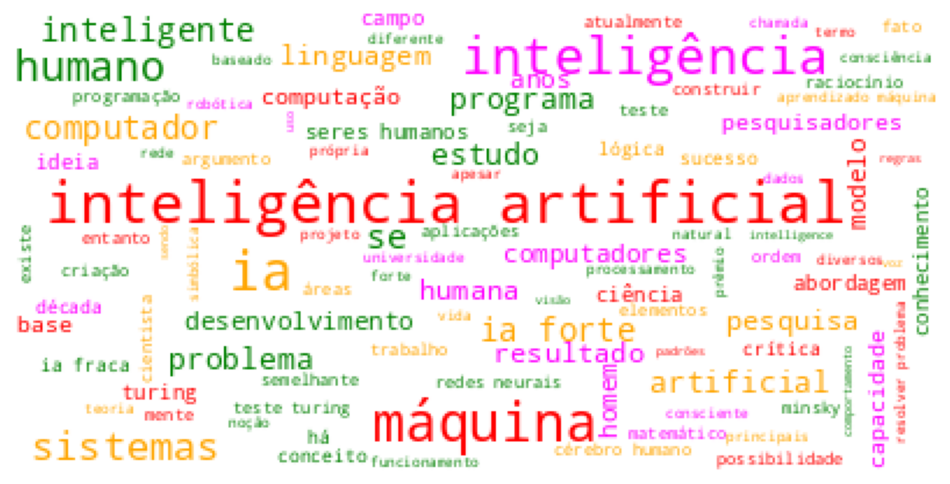

In [ ]:
# Criação de lista de cores
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

# Atribuindo parametros para nuvem de palavras usando biblioteca WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

# Gerando a nuvem de palavras e
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')
plt.show()